## Time Series Practical Assignment 

## Assignment

In this assignment students have to make ARIMA model over shampoo

sales data and check the MSE between predicted and actual value.

Student can download data in .csv format from the following link:

https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv

Hint:

Following is the command import

packages and data from pandas import

read_csv from pandas import datetime

from matplotlib import pyplot

from statsmodels.tsa.arima_model

import ARIMA from sklearn.metrics

import mean_squared_error 

def parser(x):

return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv', 

header=0, parse_dates=[0],

index_col=0, squeeze=True, date_parser=parser)

Task: Deploy this assignment in any cloud platform.(Try to look for free cloud platform)

Assignment: Submit assignment’s deployable link only.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime

In [10]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

path = "https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv"
series = pd.read_csv(path, header=0,parse_dates=True,index_col='Month',sep =";")
series.head()

,Sales
Month,
01-01,266.0
01-02,145.9
01-03,183.1
01-04,119.3
01-05,180.3


In [12]:
series = series.dropna()

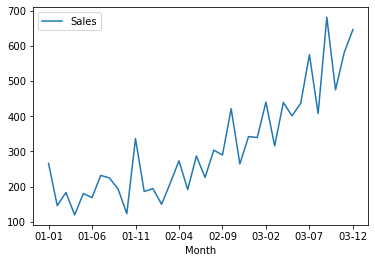

In [13]:
series.plot()
plt.show()

In [14]:
X = series.values
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [15]:
train, test = X[0:size], X[size:len(X)]

In [16]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history,order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Predicted={yhat},Expected ={obs}')
error = mean_squared_error(test,predictions)
print(f"TEST MSE :{error}")

C:\Users\sayan\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Predicted=[272.96447746],Expected =[421.6]
Predicted=[290.31390671],Expected =[264.5]
Predicted=[349.11763249],Expected =[342.3]
Predicted=[306.51296307],Expected =[339.7]
Predicted=[387.37631608],Expected =[440.4]
Predicted=[348.15422711],Expected =[315.9]
Predicted=[386.30880788],Expected =[439.3]
Predicted=[356.08203516],Expected =[401.3]
Predicted=[446.37948481],Expected =[437.4]
Predicted=[394.73730999],Expected =[575.5]
Predicted=[434.91565842],Expected =[407.6]
Predicted=[507.92347791],Expected =[682.]
Predicted=[435.48296839],Expected =[475.3]
Predicted=[652.74378576],Expected =[581.3]
Predicted=[546.34350288],Expected =[646.9]
TEST MSE :7547.8063005750355


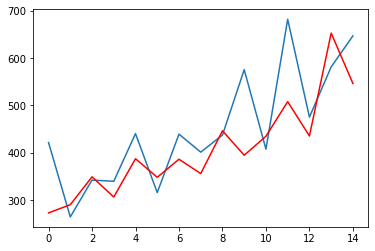

In [17]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()